# Downloading Street Networks from OpenStreetMap

Using the [osmnx](https://github.com/gboeing/osmnx) library by [Geoff Boeing](http://geoffboeing.com/publications/osmnx-complex-street-networks/).

In [4]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
def getStreetsByBbox(bbox, mode):
    south, west, north, east = bbox
    G = ox.graph_from_bbox(north, south, east, west, network_type=mode)
    G = ox.project_graph(G)
    stats_ = ox.basic_stats(G)
    fig, ax = ox.plot_graph(G, node_size=0, fig_height=10)
    return G, stats_

In [56]:
def getStreetsByPolygon(polygon, mode):
    G = ox.graph_from_polygon(polygon, network_type=mode)
    G = ox.project_graph(G)
    stats_ = ox.basic_stats(G)
    fig, ax = ox.plot_graph(G, show=True, save=False, node_size=0, fig_height=10)
    return G, stats_

In [24]:
def getStreetsByWard(shapefile, mode):
    graphs = {}
    stats = {}
    for i in shapefile.iterrows():
        name = i[1]['name']
        polygon = i[1]['geometry']
        G = ox.graph_from_polygon(polygon, network_type=mode)
        G = ox.project_graph(G)
        stats_ = ox.basic_stats(G)
        graphs[name] = G
        stats[name] = stats_
        filename = name.replace("/","") # cant have slash in filename
        filename += "_{}_streets".format(mode)
        fig, ax = ox.plot_graph(G, show=True, save=True, node_size=0, fig_height=10, 
                        filename=filename, file_format='png')
    return graphs, stats

# Mumbai Driving Streets by Ward

In [26]:
mumbai_wards = gpd.read_file('../maps/mumbai/data/mumbai_wards/mumbai_wards.shp')

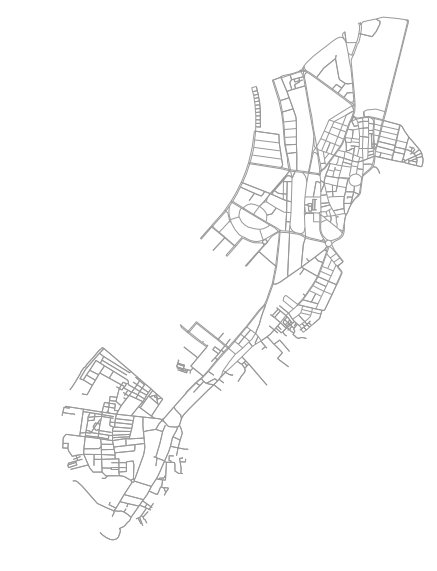

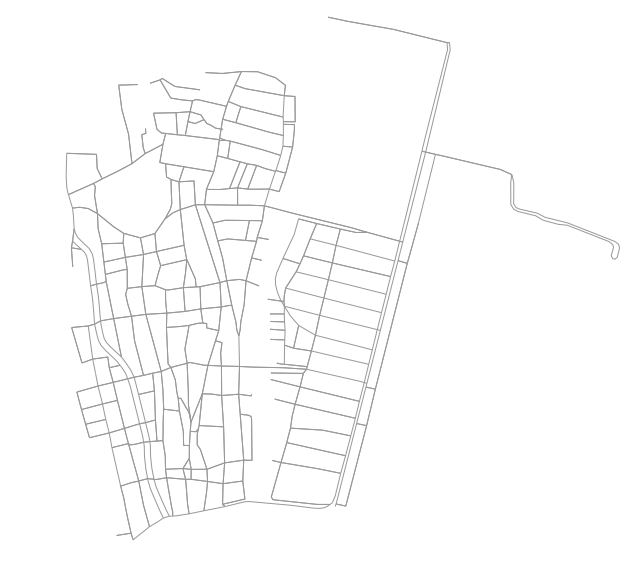

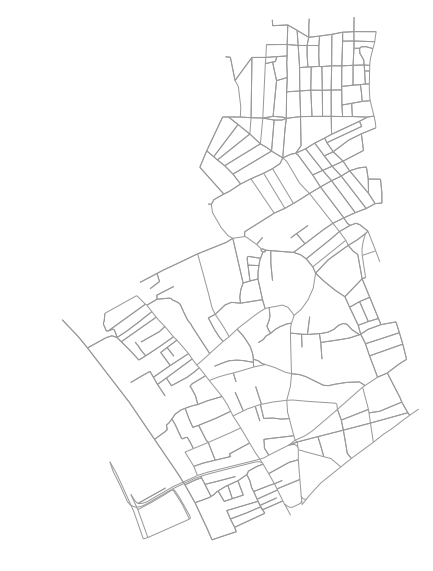

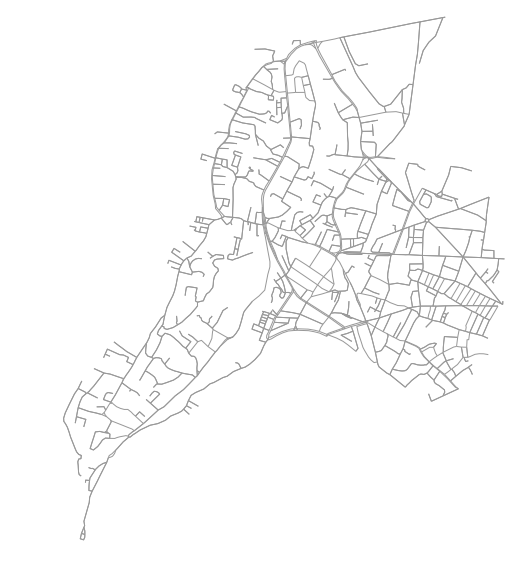

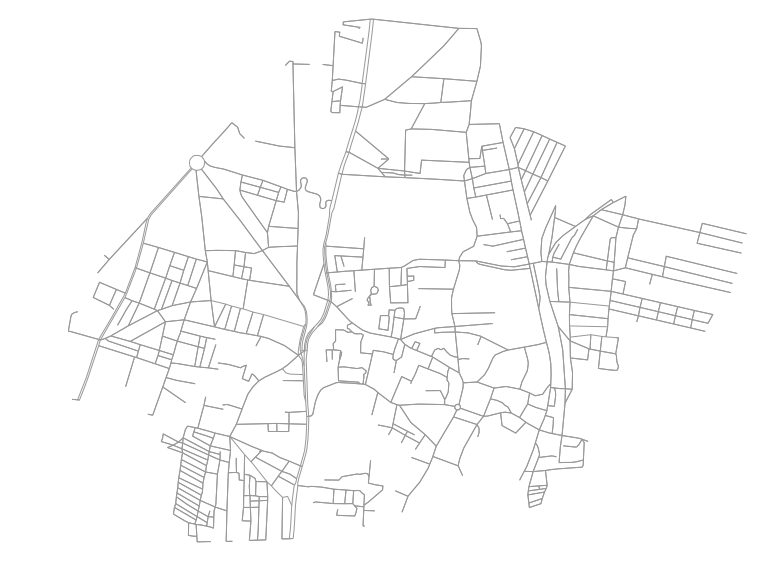

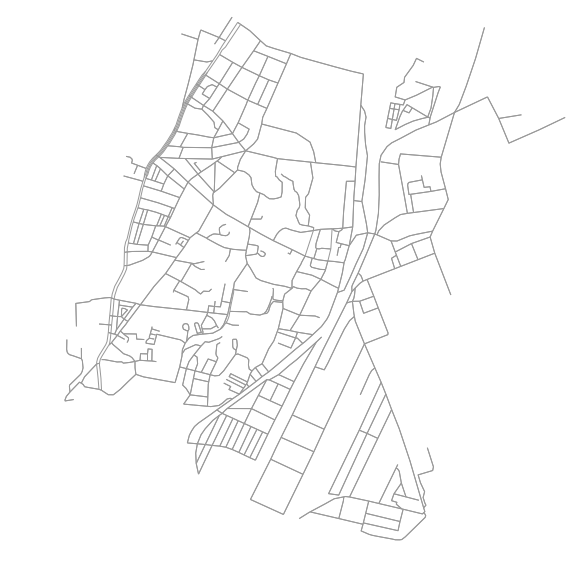

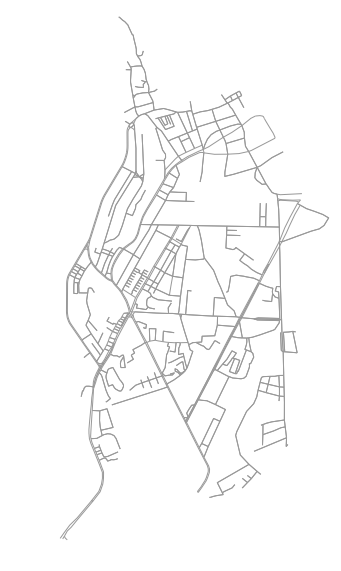

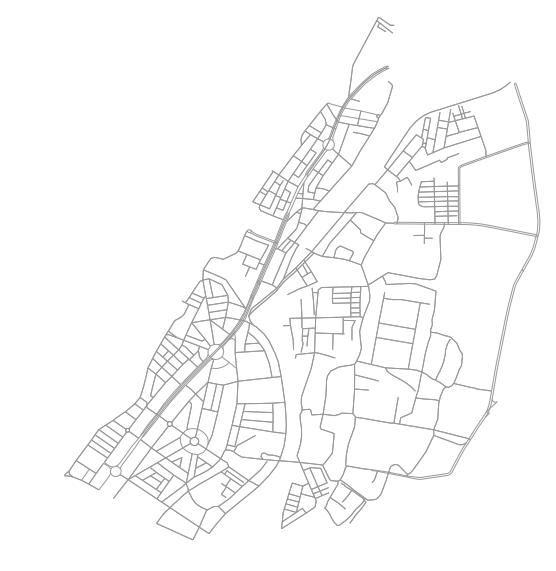

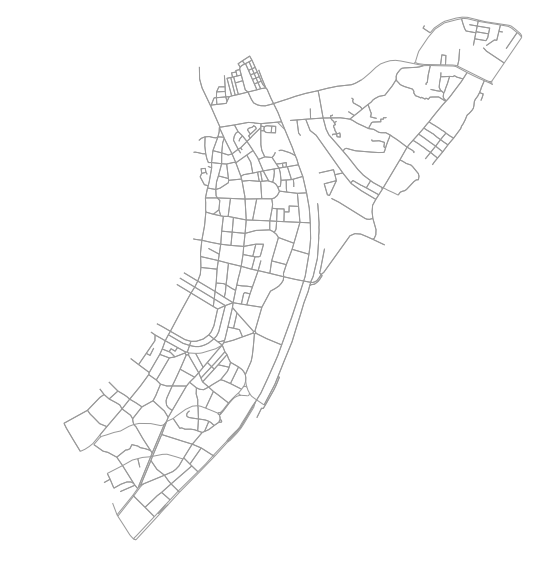

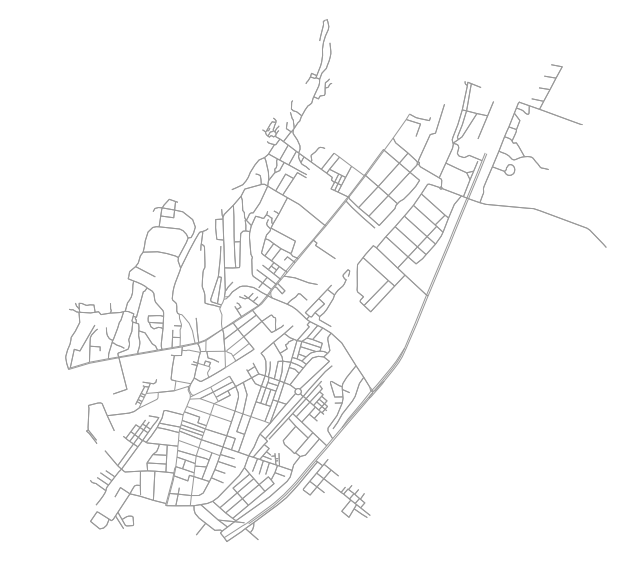

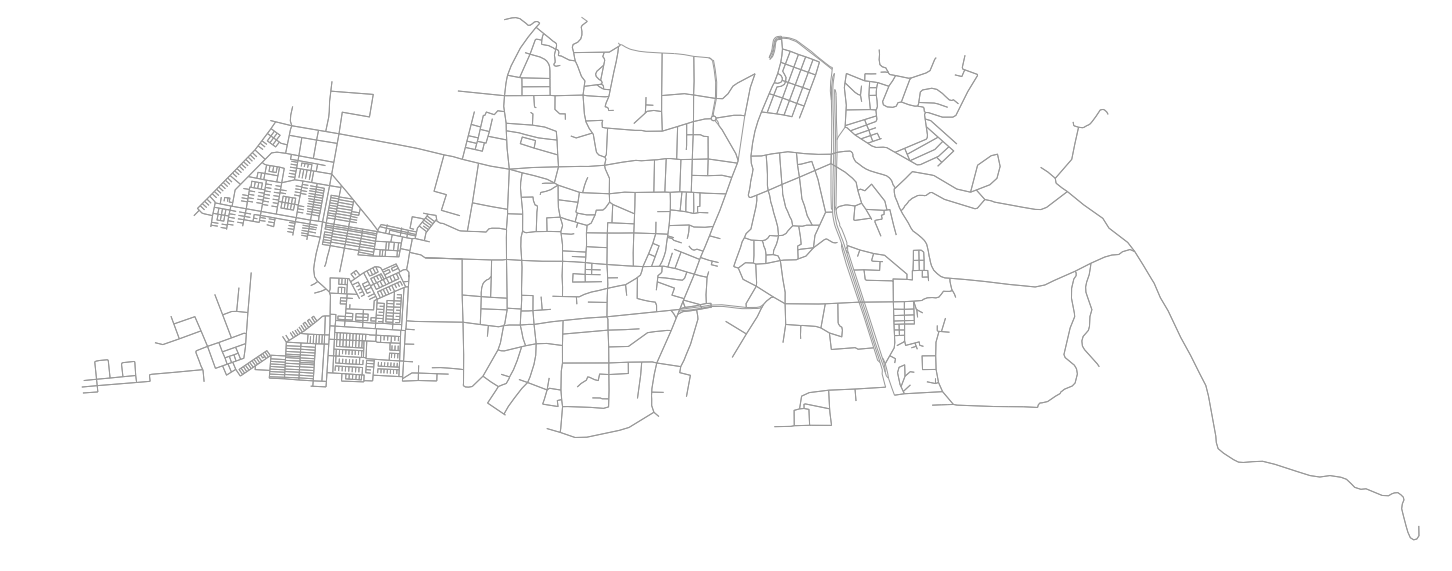

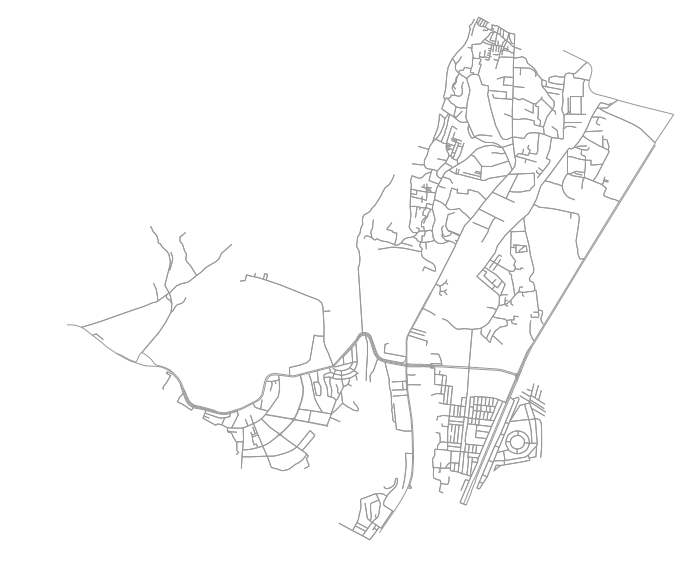

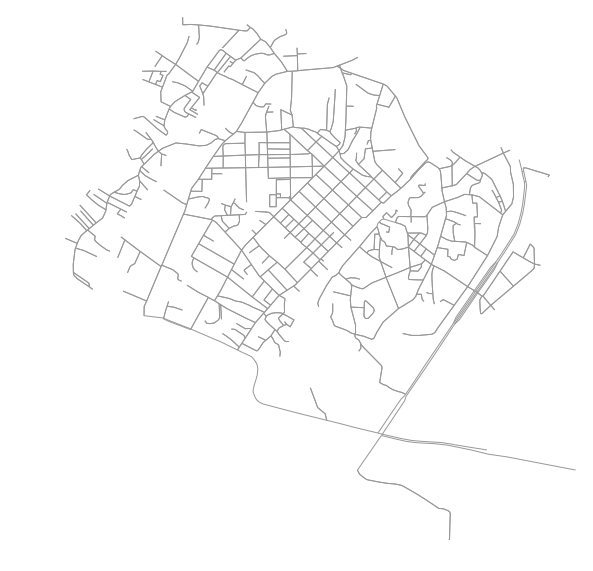

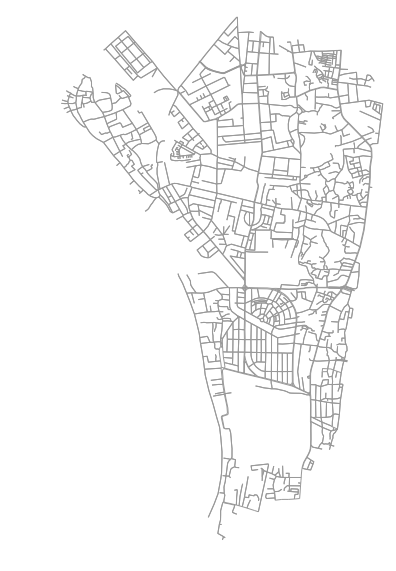

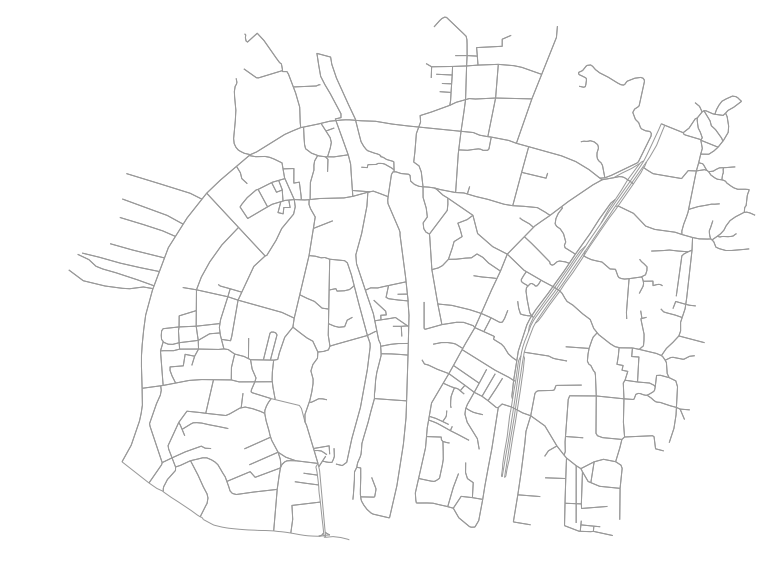

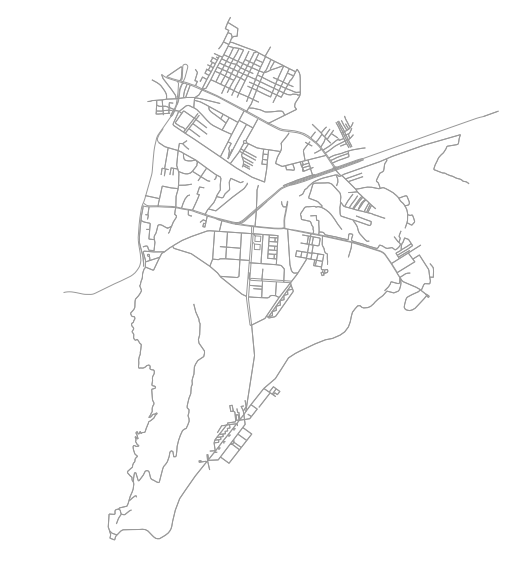

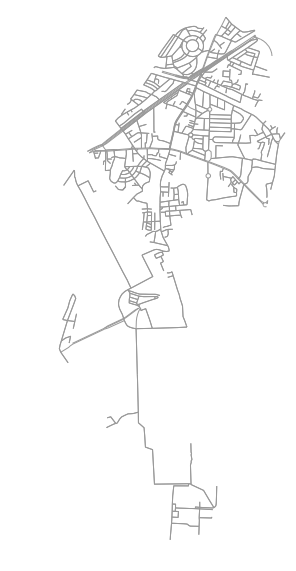

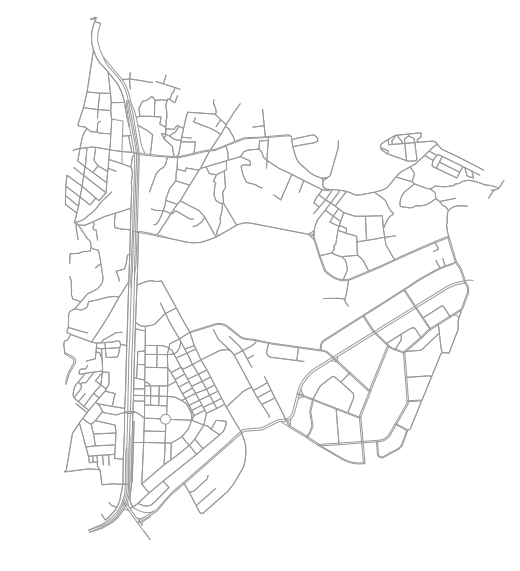

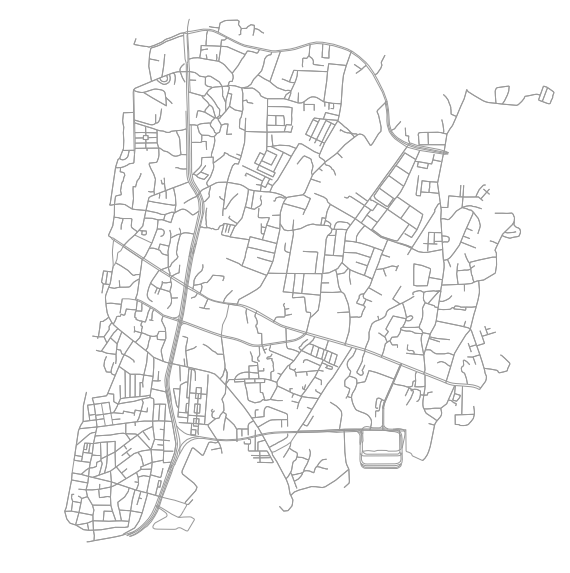

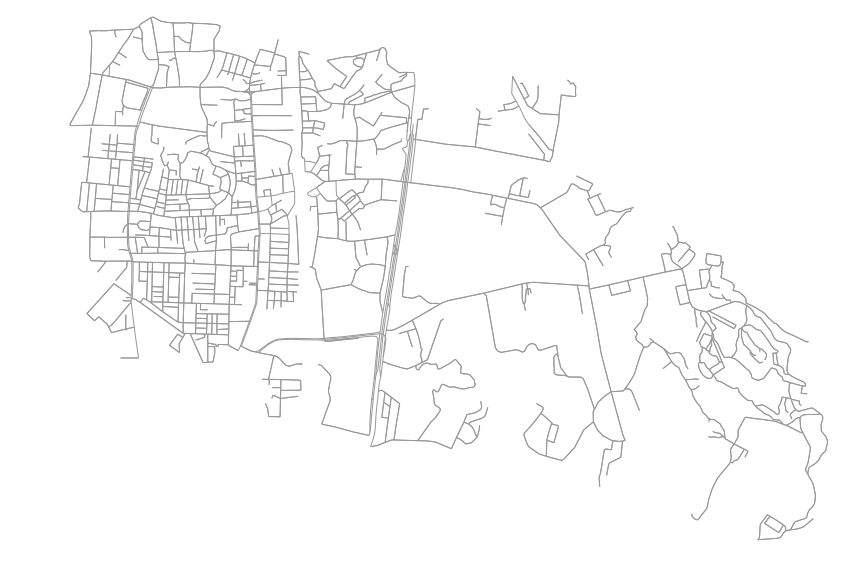

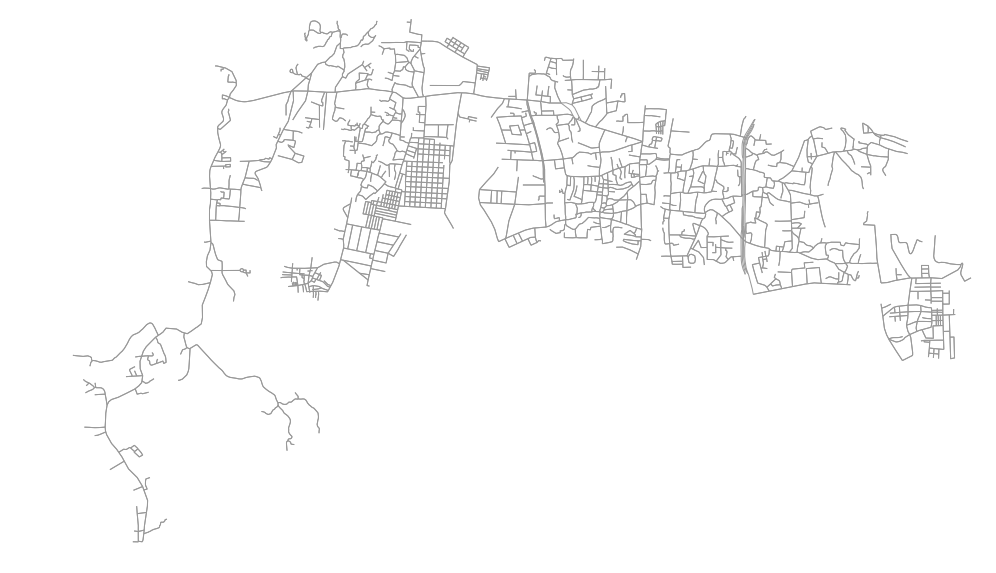

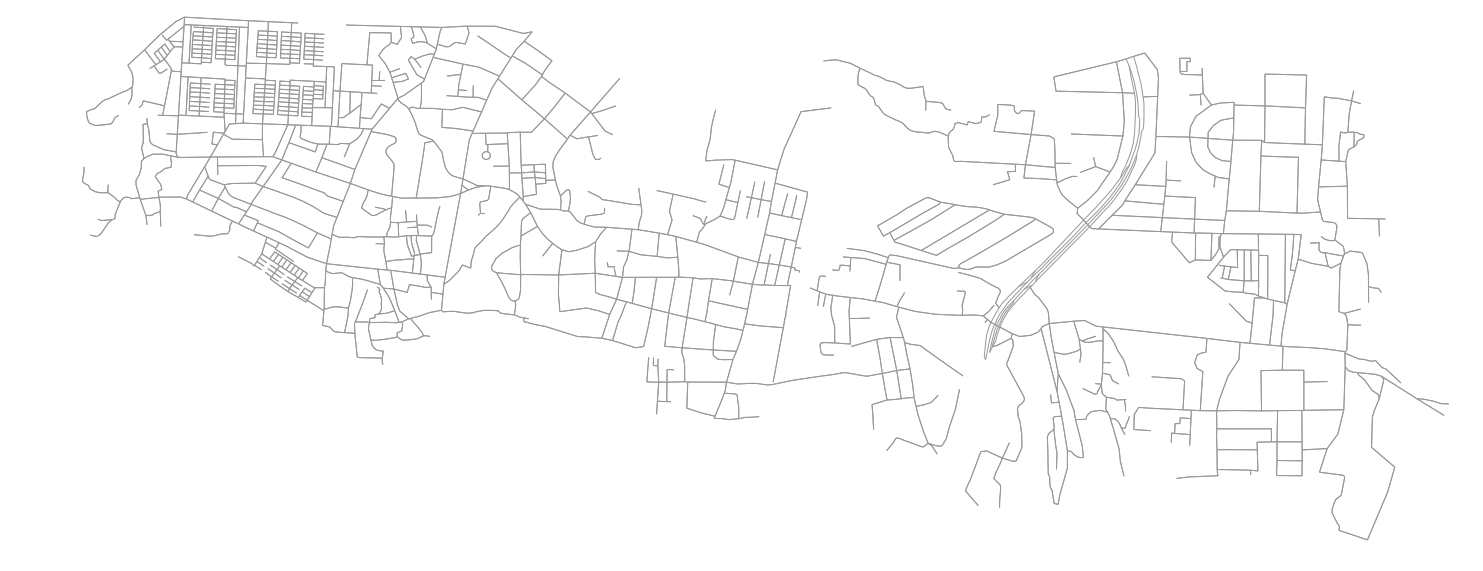

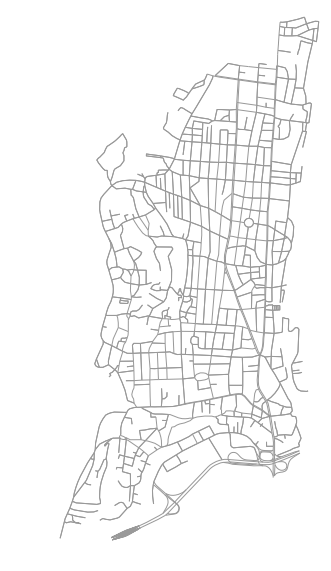

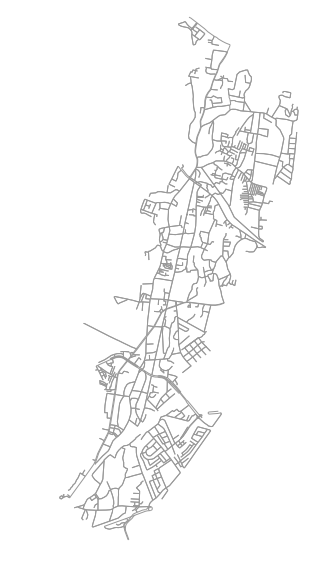

In [27]:
drive_graphs, drive_stats = getStreetsByWard(mumbai_wards, mode='drive')

# Mumbai Walking Streets by Ward

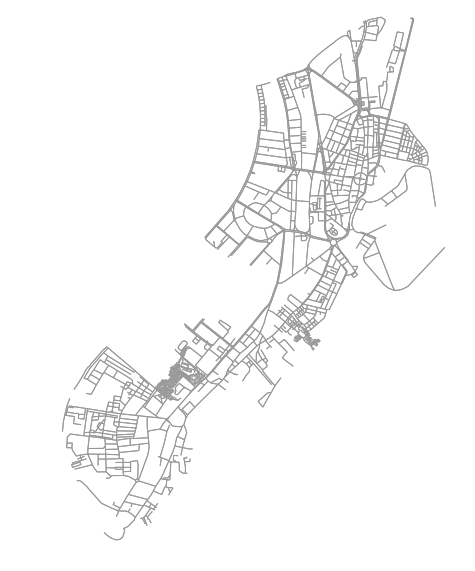

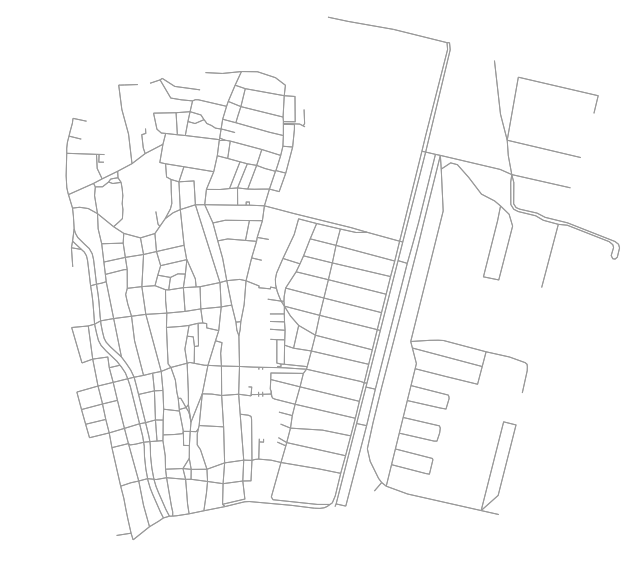

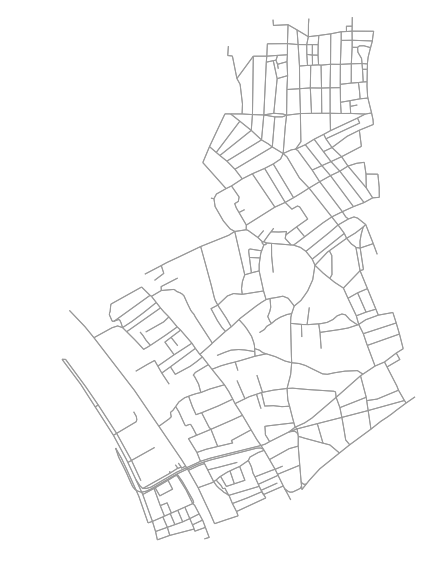

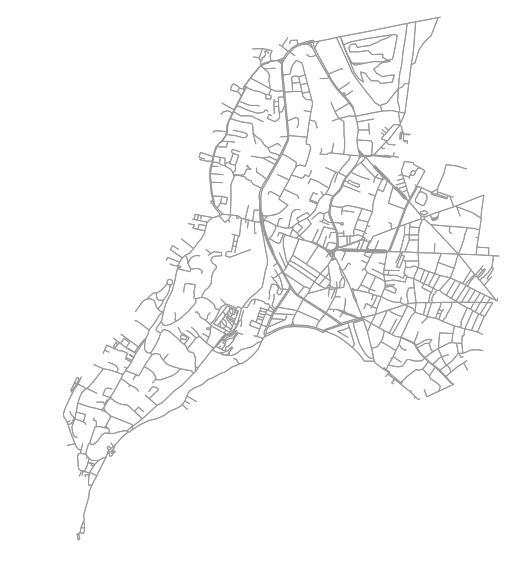

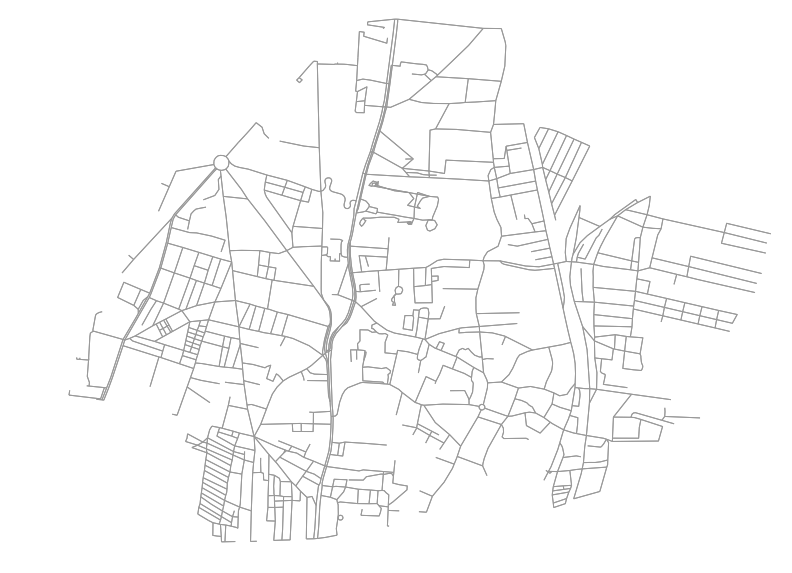

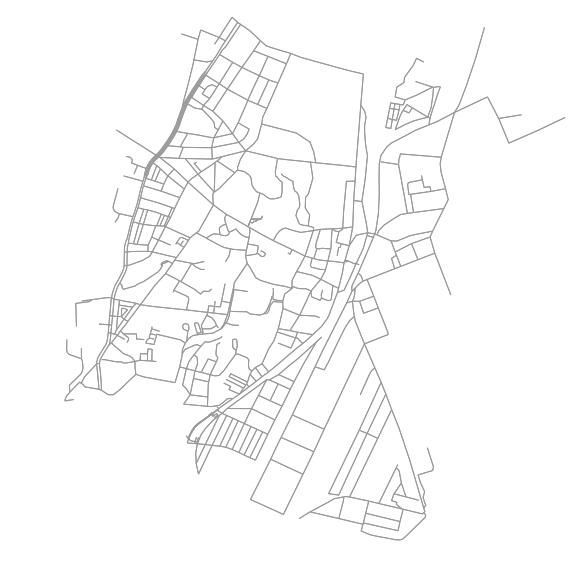

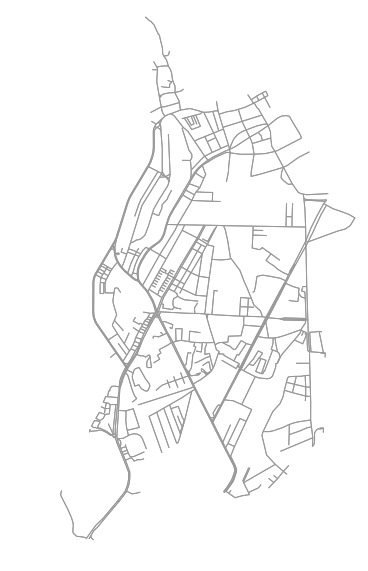

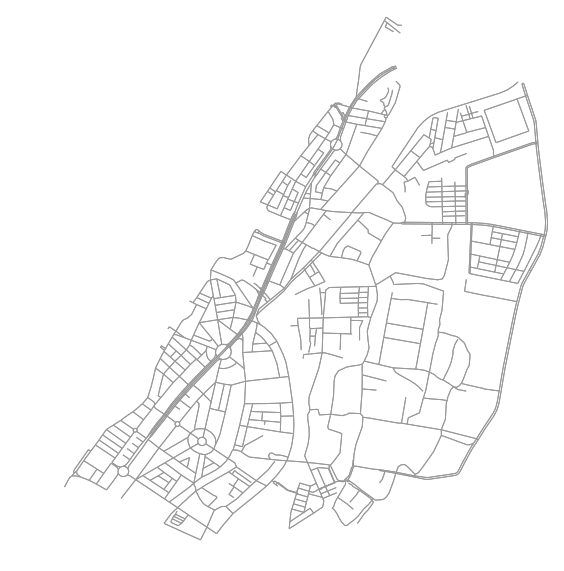

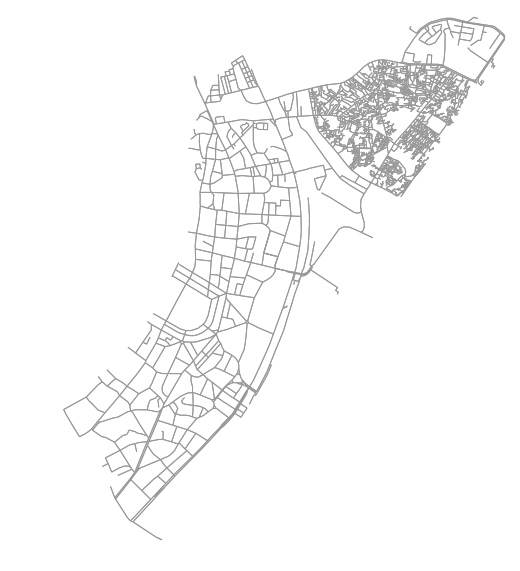

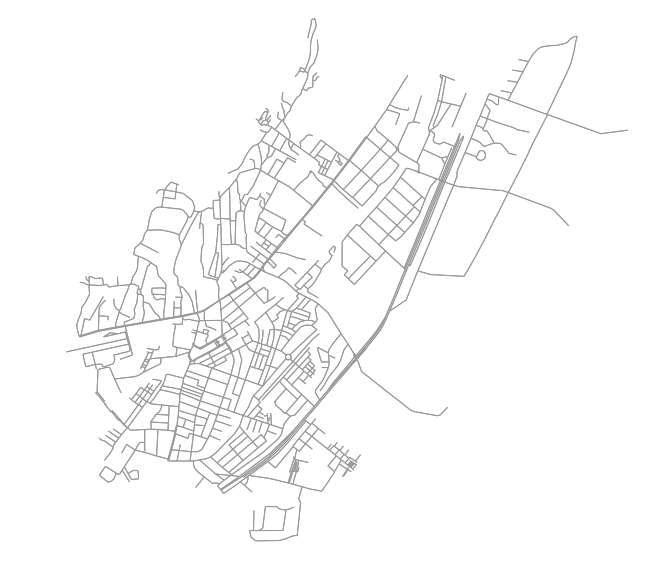

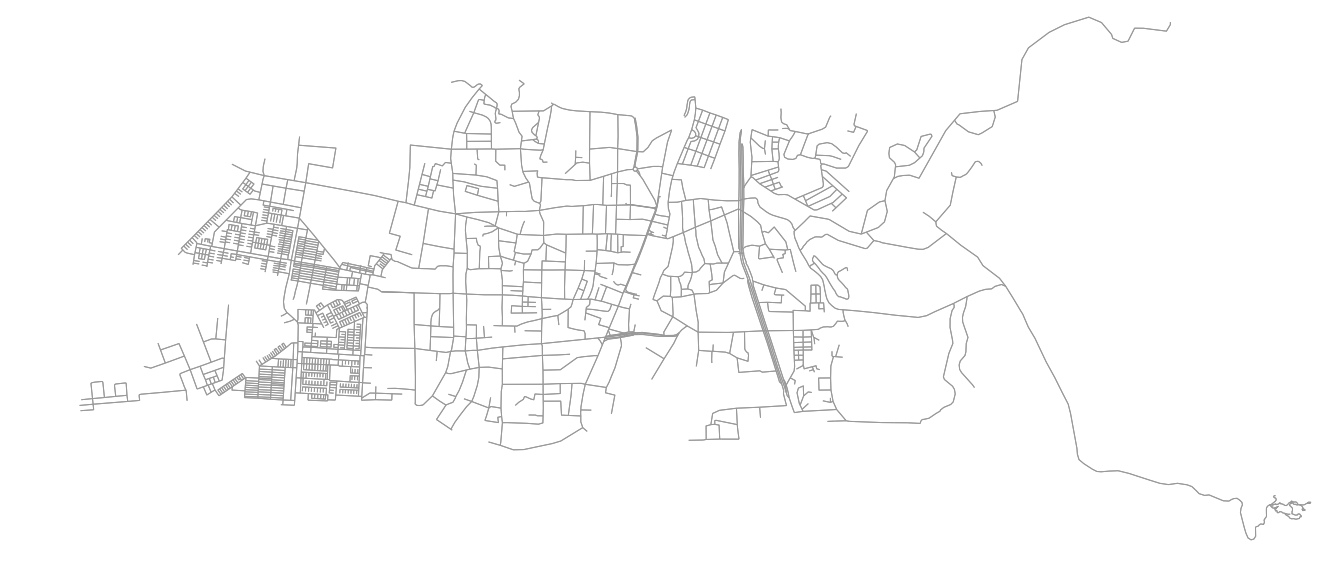

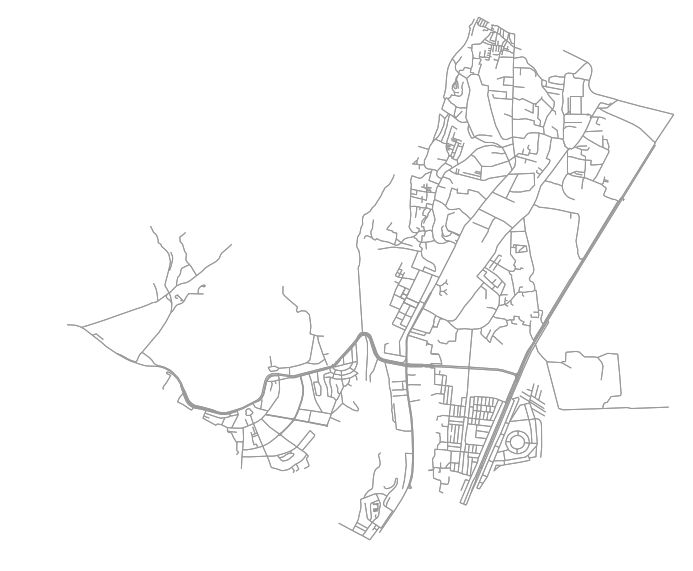

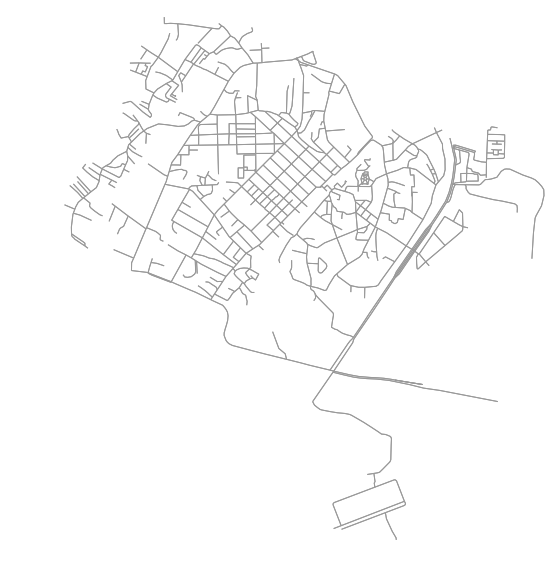

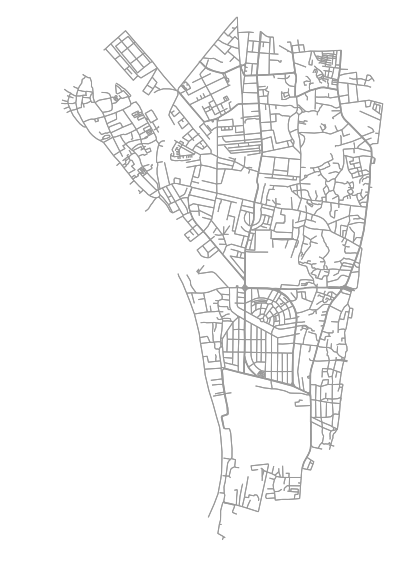

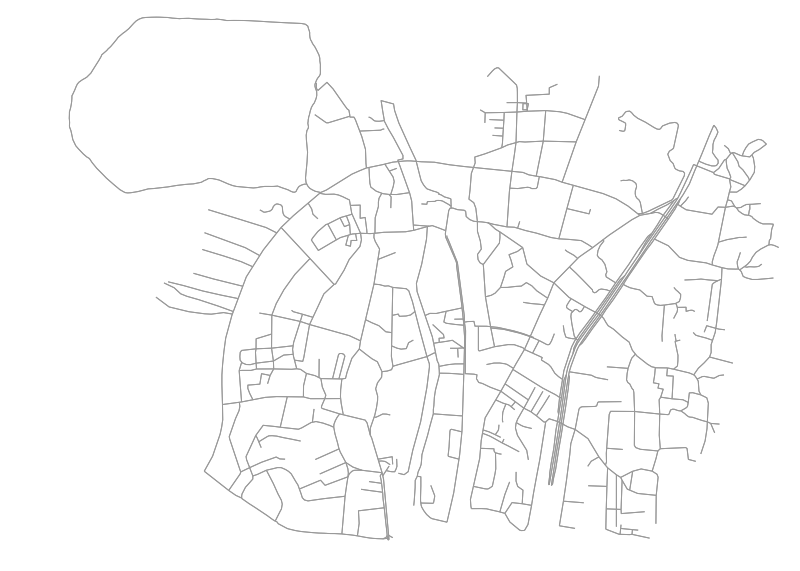

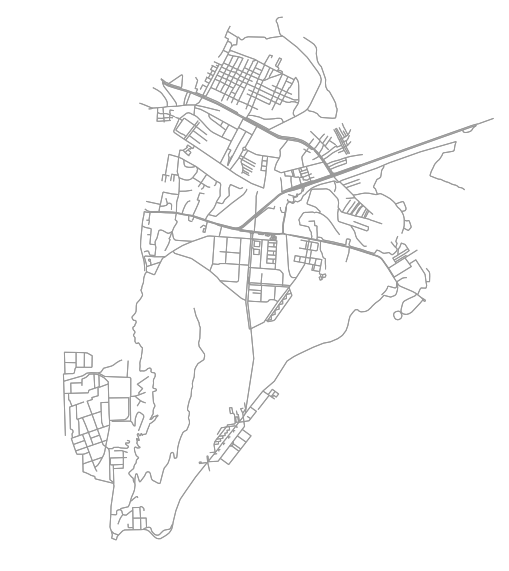

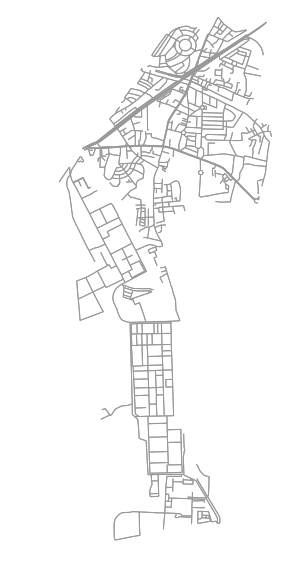

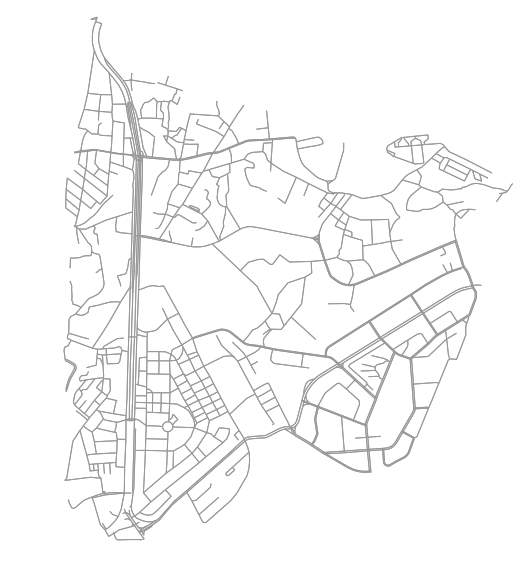

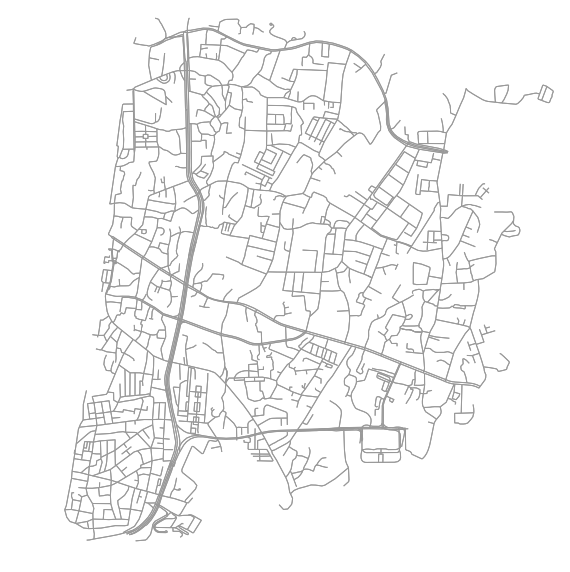

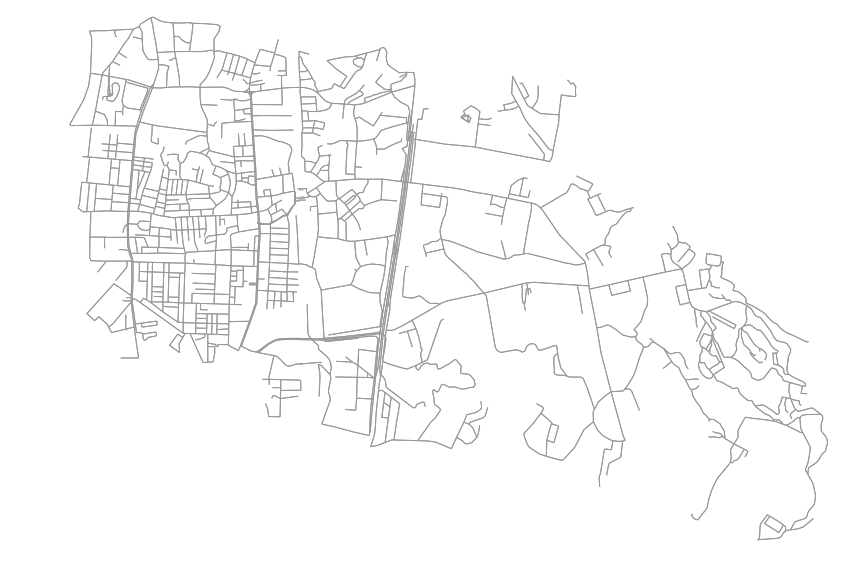

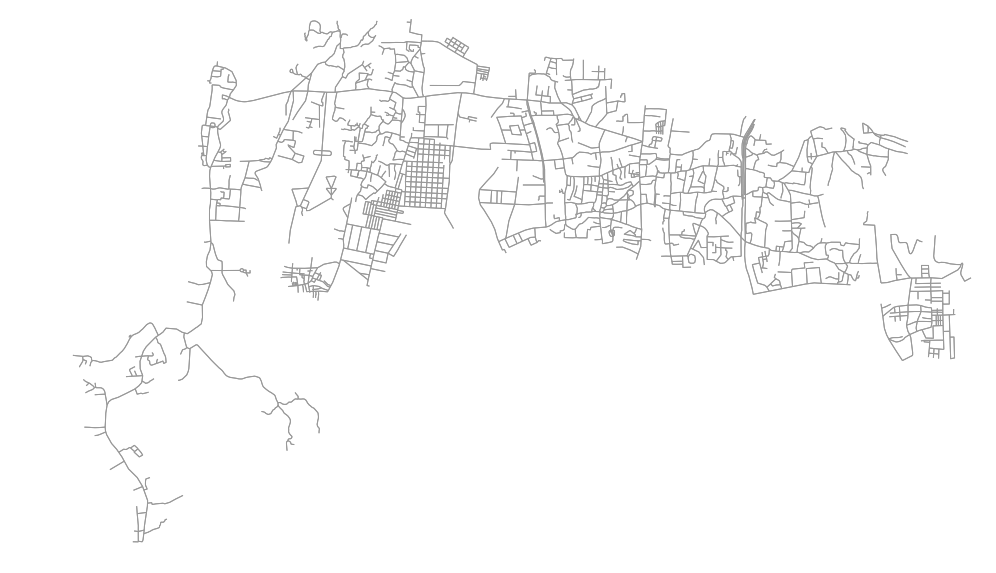

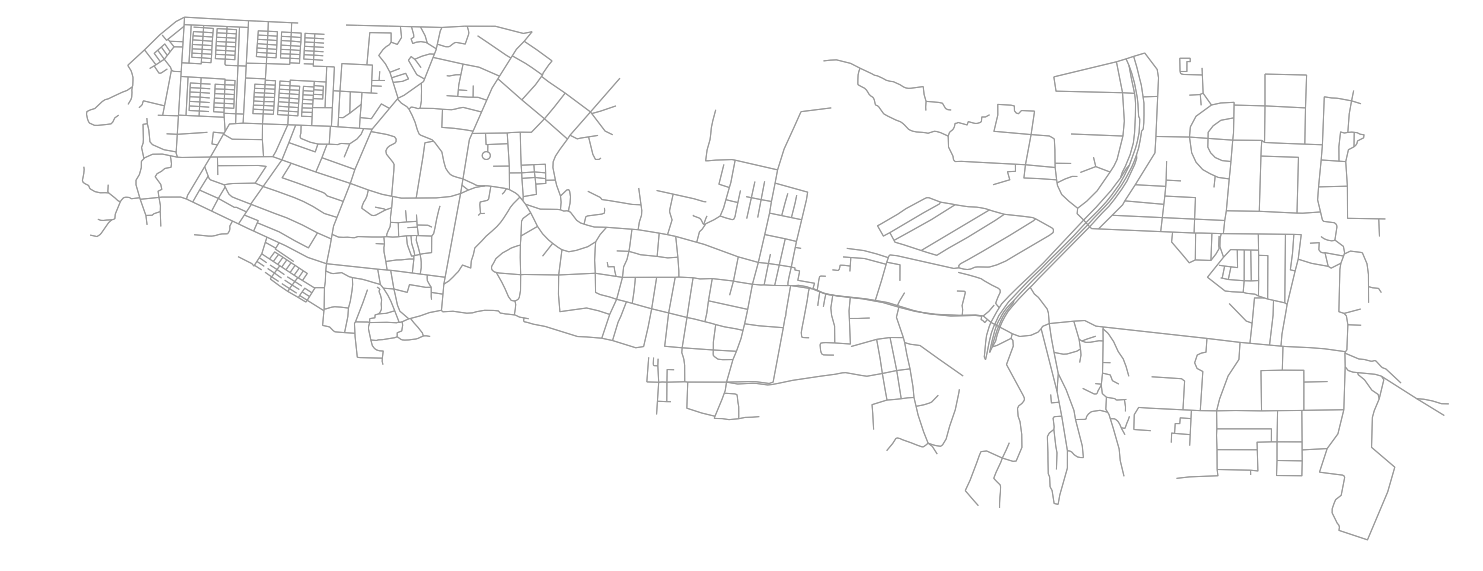

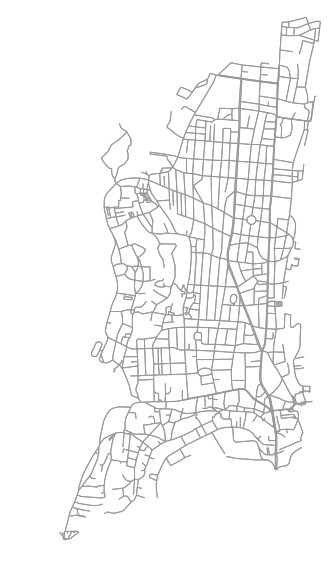

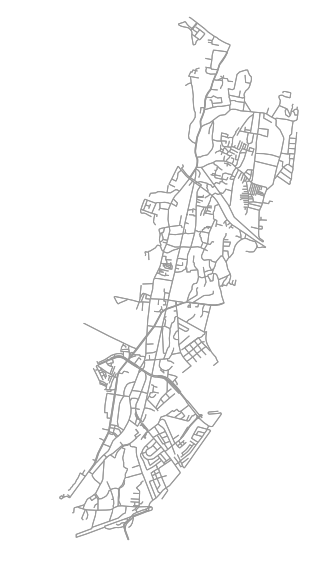

In [28]:
walk_graphs, drive_stats = getStreetsByWard(mumbai_wards, mode='walk')

# Streets for Driving in Dharavi

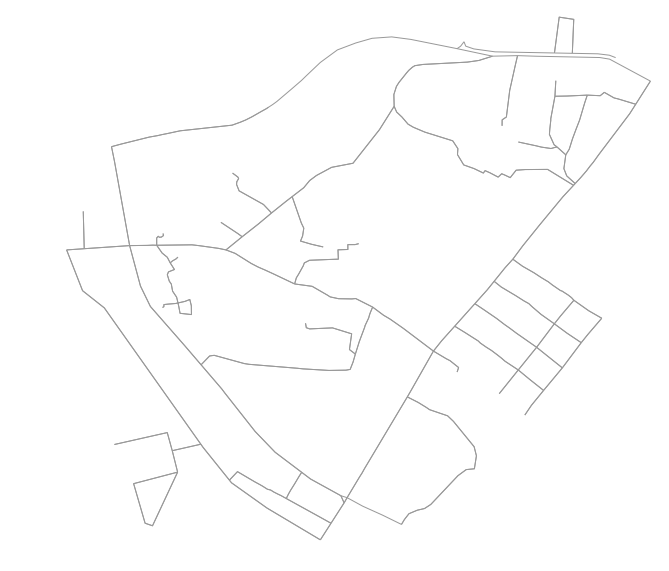

In [51]:
dharavi = [19.036927, 72.847037, 19.049178, 72.861457]
dharavi_drive_streets, dharavi_drive_stats = getStreetsByBbox(dharavi, mode='drive')

In [44]:
fig, ax = ox.plot_graph(dharavi_drive_streets, show=False, save=True, node_size=0, fig_height=10, 
                        filename='dharavi_drive_streets', file_format='png')

# Streets for Walking in Dharavi

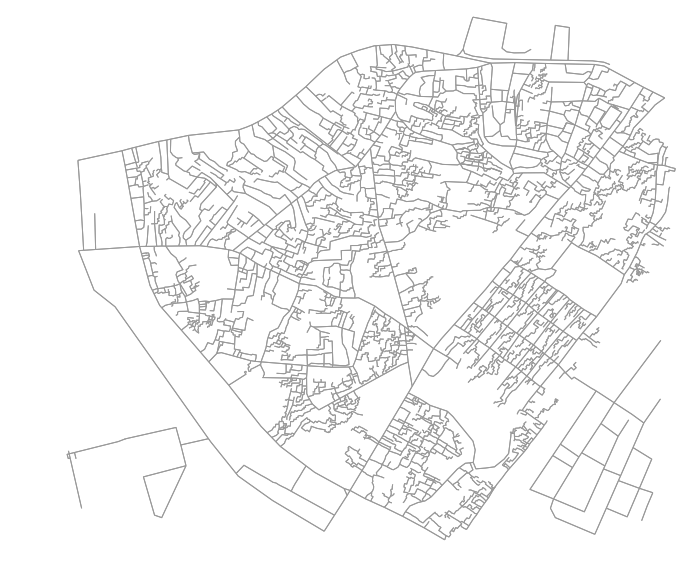

In [52]:
dharavi_walk_streets, dharavi_walk_stats = getStreetsByBbox(dharavi, mode='walk')

In [53]:
fig, ax = ox.plot_graph(dharavi_walk_streets, show=False, save=True, node_size=0, fig_height=10, 
                        filename='dharavi_walk_streets', file_format='png')

# Streets for Driving in Ballard Estate / Fort neighborhood

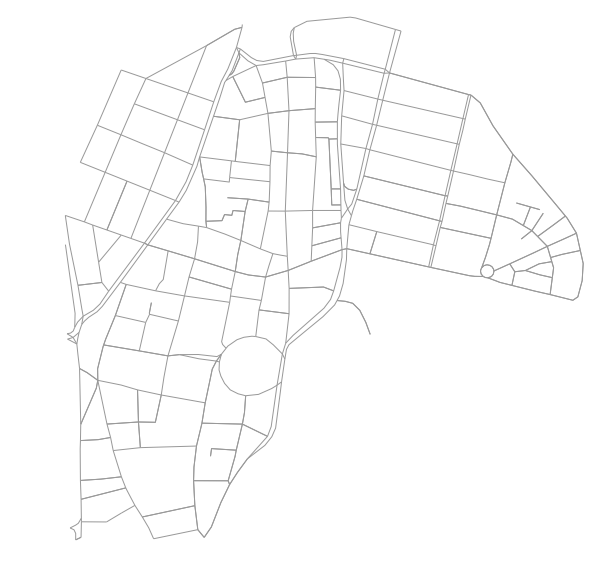

In [54]:
ballard_estate = [18.928209,72.830880,18.939352,72.844269]
ballard_estate_driving_streets, ballard_estate_driving_stats = getStreetsByBbox(ballard_estate, mode='drive')

# Streets for Walking in Ballard Estate / Fort neighborhood

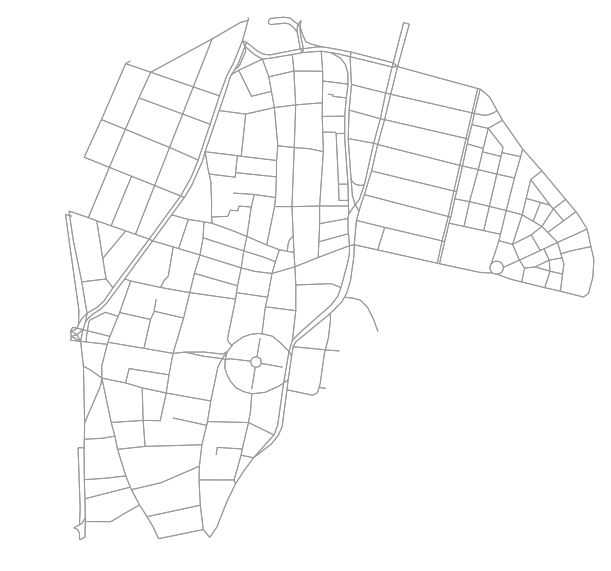

In [55]:
ballard_estate_walking_streets, ballard_estate_walking_stats = getStreetsByBbox(ballard_estate, mode='walk')

# Driving Streets for all of Mumbai

In [75]:
mumbai_outline = gpd.read_file("../maps/mumbai/data/mumbai_outline/mumbai_outline.shp")
mumbai_outline['city'] ='mumbai'
mumbai_polygon = mumbai_outline.dissolve(by='city')['geometry'].loc['mumbai']

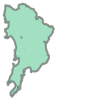

In [76]:
mumbai_polygon

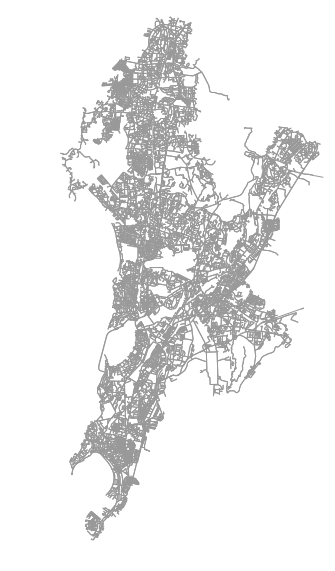

In [77]:
mumbai_drive_streets, mumbai_drive_stats = getStreetsByPolygon(mumbai_polygon, mode='drive')

In [86]:
ox.save_graph_shapefile(mumbai_drive_streets, filename='mumbai_drive_streets')

# Walking Steets for all of Mumbai

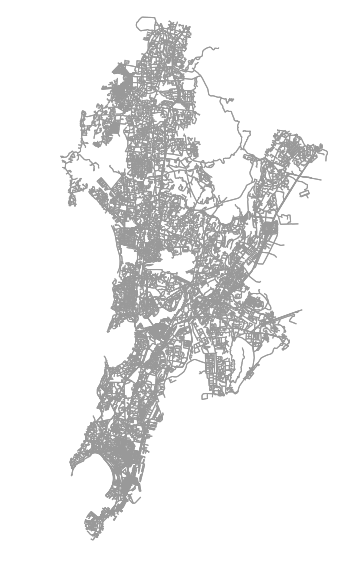

In [87]:
mumbai_walk_streets, mumbai_walk_stats = getStreetsByPolygon(mumbai_polygon, mode='walk')

In [88]:
ox.save_graph_shapefile(mumbai_walk_streets, filename='mumbai_walk_streets')